In [5]:
#Terminal Spped
import math
m=2 # kg
g=9.8 # m/s^2
p_air=1.2 # kg/m^3
C_air=0.47
A=math.pi*0.12**2 # m^2
v_terminal=-math.sqrt((2*m*g)/(p_air*C_air*A))
print("v=",v_terminal," m/s")


v= -39.196500914051185  m/s


Text(0, 0.5, 'velocity, v (m/s)')

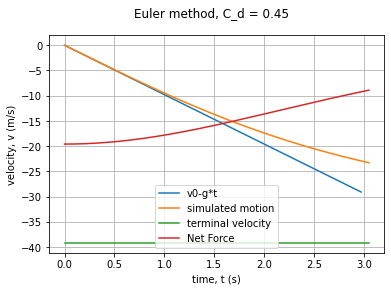

In [7]:
import math

# constants
v_terminal=39.196
m=2 #(kg) pumpkin
C_d=0.45 # sphere
#C_d=1e-19 # turned off
rho_air=1.2 # (kg/m^3)
r=6*0.0254 # (m) radius
A=math.pi*r**2 # (m^2) sphere
g=9.8 # (N/kg) Earth's surface

v0=-1e-12 # not zero to avoid divergence
h0=40 # (m) initial height 
t=0
dt=1e-3 # (s)

#v=v0
#F = -m*g + 0.5*C_d*rho_air*A*v*v*(-1.0*v/abs(v)) # the last bit is a unit vector so that air resistance points against velocity

t=0
v=v0
y=h0
t_limit=60 # (s) stop simulation after this time
v_s=[]
y_s=[]
t_s=[]
F_s=[]


# repeat DiffEq solver procedure many many times to get an approximate model for the motion
while (y>0 and t<t_limit) :
    
    # compute force
    F = -m*g + 0.5*C_d*rho_air*A*v*v*(-1.0*v/abs(v)) # the last bit is a unit vector so that aire resistance points against velocity

    # apprimately solve differential equation over a very short time interval
    # sometimes, this is called an "Euler" method
    a = F/m
    v2 = v + a*dt
    y2 = y + v*dt
    F2 = F + dt

    # store the current dynamic values
    v_s.append(v)
    y_s.append(y)
    t_s.append(t)
    F_s.append(F)
   
    
    # update/recycle values for the next loop
    t = t + dt
    v = v2
    y = y2
    F=F2

import matplotlib.pyplot as plt
N=100
tfake=[]
vfake=[]

for i in range(N):
    tf=i*3/N
    tfake.append(tf)
    vfake.append(-tf*g+v0)

fig, axs = plt.subplots(1,1)
fig.suptitle("Euler method, C_d = %.2f"%C_d)
plt.plot(tfake,vfake,label="v0-g*t")
plt.plot(t_s,v_s,label="simulated motion")
plt.plot([min(t_s),max(t_s)],[-v_terminal,-v_terminal],label="terminal velocity")
plt.plot(t_s,F_s,label="Net Force")
plt.legend()
plt.grid()
plt.xlabel("time, t (s)")
plt.ylabel("velocity, v (m/s)")

Text(0.5, 1.0, 'Earth and Moon System Energy for a Ranger')

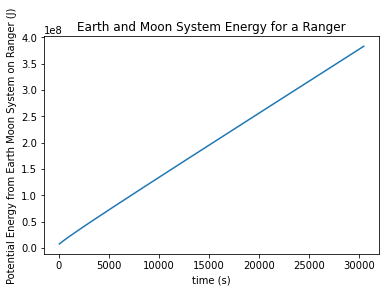

In [23]:
#F ranger Problem
G=6.67e-11 
m_earth=5.98e24 # kg (Earth's mass)
m_ranger= 10000 # kg (mass of rcocket)
m_moon=7.35e22 # kg (moon's mass)
r_earth=6.388e6 # m (radius of Earth)
r_moon_earth=3.844e8 # m (distance from Earth to moon)
r_moon=1740e3 #m
R_1=r_earth+50e3
R_2=r_moon_earth-r_moon
v2=math.sqrt((2*G*m_earth)/R_1)*1.5
t=0
t_limit=14*24*3600 #s
dt=60

N=1000
dr=(R_2-R_1)/N

t_vals=[]
r_vals=[]
v_vals=[]
F_earth_vals=[]
F_moon_vals=[]
F_vals=[]
U_earth_vals=[]
U_moon_vals=[]
U_net_vals=[]
K_energy_vals=[]
E_net_vals=[]
#for i in range(N):
 #  t2=t+dt
  #  r=R_1+dr*i
   # U_earth=(-G*m_earth*m_ranger)/(r)
    #U_moon=(-G*m_moon*m_ranger)/(r_moon_earth-r)
    #U_net=U_earth+U_moon
   # K_energy=0.5*m_ranger*v**2
   # E_net=U_net+K_energy
    
   # r_vals.append(r)
    #v_vals.append(v)
   # F_earth_vals.append(F)
   # U_earth_vals.append(U_earth)
   # U_moon_vals.append(U_moon)
   # U_net_vals.append(U_net)
   # K_energy_vals.append(K_energy)
   # E_net_vals.append(E_net)
t=0 
r=R_1
while (r>r_earth and r<r_moon_earth-r_moon and t<t_limit) :
    F_earth=(-G*m_earth*m_ranger)/(r**2)
    F_moon=(G*m_moon*m_ranger)/((r_moon_earth-r)**2)
    F=F_earth+F_moon
    a=F/m_ranger
    v2 = v2 + a*dt
    r= r + v2*dt
    t=t+dt
    
    t_vals.append(t)
    v_vals.append(v2)
    r_vals.append(r)
    F_vals.append(F)
    
    
import matplotlib.pyplot as plt
plt.plot(t_vals,r_vals)
 #plt.plot(t_vals,v_vals)
plt.ylabel("Potential Energy from Earth Moon System on Ranger (J)")
plt.xlabel("time (s)")
plt.title("Earth and Moon System Energy for a Ranger")
#plt.legend()
#plt.grid()


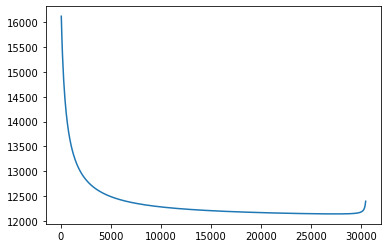

In [24]:
plt.plot(t_vals,v_vals)